### Logistic regression
#### Approaches to be used:

__Gradient Descent:__

- Randomly initialize $\theta_0$, $k=0$
- Update: while $k \leq max(iteration)$ and$\|\theta^{k-1}-\theta^{k}\|_2 > \epsilon$
    - $k \leftarrow k + 1$
    - $\theta^{k} \leftarrow \theta^{k-1} - \bigtriangledown F(\theta^{k-1})$
- Output $\hat{\theta}$

__Equations to be used:__
Other than the gradient updating equations, the gradient itself is $$\bigtriangledown F(\bf{\theta}) = - \left(\bf{X}^\intercal \bf{y} - \bf{X}^\intercal \sigma(\bf{X}\bf{\theta})\right)$$.
Where $\sigma$ is the sigmoid function

In [53]:
# Import necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [54]:
# Shuffle and partition the shuffled data into k=5 different folds

def partition(df,k=5):
    
    # Randomly shuffle the data by sampling and reset index
    df_shuffled = df.sample(frac=1).reset_index(drop=True)
    ni = int(df.shape[0]/k) # compute the number of rows of each fold

    # creat dictionaries
    X_shuffled = {}
    y_shuffled = {}
    
    # partition the data
    for i in range(1,k+1):
        X_shuffled[i], y_shuffled[i] = df_shuffled.iloc[0:ni,0:3], df_shuffled.iloc[0:ni,3]
        df_shuffled = df_shuffled.reset_index(drop=True)
        df_shuffled = df_shuffled.drop(range(0,ni),axis = 0)
        df_shuffled = df_shuffled.reset_index(drop=True)
    
    return X_shuffled, y_shuffled

In [55]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    
    X_valid, y_valid = X_shuffled[itr], y_shuffled[itr] # select the itr fold for validation
    
    # Creat new dictionaries to store data for training
    X_for_train = {n: X_shuffled[n] for n in range(1,6) if n!=itr}
    y_for_train = {n: y_shuffled[n] for n in range(1,6) if n!=itr}
    
    # Concatenate the rest of folds for training
    X_train,y_train = pd.concat(X_for_train.values()), pd.concat(y_for_train.values())
    
    return X_train, y_train, X_valid, y_valid

In [56]:
# Define some functions to compute loss

# Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Gradient 
def gradient(theta,X,y):
    n = X.shape[0]
    c1 = X@theta
    c2 = X.T @ y - (X.T@sigmoid(c1))
    return -c2/n

In [57]:
# Training function
def train(X_train, y_train,theta,eta=0.001,iters=1000):
    
    # Gradient descent
    #for i in range(iters):
    i = -1
    theta0 = theta
    
    while i<=iters and np.linalg.norm(theta1-theta0,2)>1e-5:
        
        i+=1
        theta = theta0 - eta*gradient(theta0,X_train,y_train)
        theta0 = theta
        
    return theta0

In [58]:
# Define the predicting function

def predict(X_valid, theta):
    
    labels = sigmoid(X_valid@theta) >= 0.5
    y_pre = np.multiply(labels,1)
    
    return y_pre

In [59]:
# Define the function for computing error
def error(y_predict,y_valid):
    
    err = sum((y_predict != y_valid))
    
    return err


In [60]:
# Integrate the above functions

# Import data 
df_feature = pd.read_csv("IRISFeat.csv",header=None)
df_label = pd.read_csv("IRISlabel.csv",header=None)
# Including an intercept into the data
one = pd.DataFrame([1]*df_feature.shape[0])
df = pd.concat([one,df_feature,df_label],axis=1)
df.columns = ['x0','x1','x2','y']


while True:
    
    # Shuffle and partition data for 5-folds cross-validation
    X_shuffled, y_shuffled = partition(df, k=5)
    
    # Initialize randomly
    theta0 = np.random.normal(size = (3,))
    
    
    # Cross-validation on training data
    err_train = []
    err_test = []
    
    hyper = np.random.uniform(0.001,0.05,100)
    hyper.sort()
    
    for eta in hyper:
        inner_err_train = []
        inner_err_test = []
        for itr in range(1,6):
            
            X_train,y_train, X_valid, y_valid = get_next_train_valid(X_shuffled,y_shuffled,itr)
            X_train, y_train,X_valid, y_valid = np.array(X_train), np.array(y_train),np.array(X_valid), np.array(y_valid)
            
            theta1 = train(X_train,y_train,theta=theta0,eta=eta,iters=1000)
            
            y_predict_test = predict(X_valid,theta1)
            y_predict_train = predict(X_train,theta1)
            
            inner_err_test.append(error(y_predict_test, y_valid))
            inner_err_train.append(error(y_predict_train, y_train))
            
        err_train.append(sum(inner_err_train)/5)
        err_test.append(sum(inner_err_test)/5)
        
    break
    

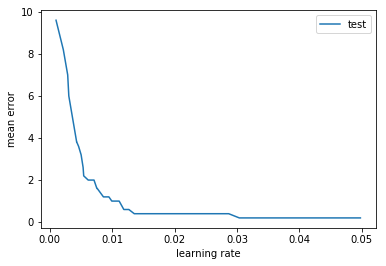

In [61]:
# Plot the testing errors
plt.plot(hyper,err_test,label = 'test')
plt.ylabel('mean error')
plt.xlabel('learning rate')
plt.legend()

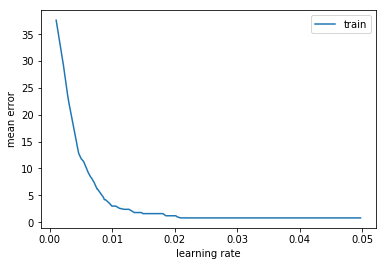

In [62]:
# Plot the training errors
plt.plot(hyper,err_train,label = 'train')
plt.ylabel('mean error')
plt.xlabel('learning rate')
plt.legend()

- From both the training and testing errors we can see that choose learning rate around 0.03 is ideal. 
- If learning rate is too large the gradient descent algorithm might not easily converge.